In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Final_Train.Xlsx')

In [3]:
test=pd.read_excel('Final_Test.Xlsx')

In [4]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
Qualification    5961 non-null object
Experience       5961 non-null int32
Rating           5961 non-null int32
Place            5961 non-null object
Profile          5961 non-null object
Fees             5961 non-null int64
dtypes: int32(2), int64(1), object(3)
memory usage: 232.9+ KB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
Qualification    1987 non-null object
Experience       1987 non-null int32
Rating           1987 non-null int32
Place            1987 non-null object
Profile          1987 non-null object
dtypes: int32(2), object(3)
memory usage: 62.2+ KB


In [7]:
data['Fees'].max()

950

In [8]:
data[data['Fees']==950]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
293,"MBBS, MD - Internal Medicine, FRCP",29 years experience,100%,"Adyar, Chennai",General Medicine,"100% 175 Feedback Adyar, Chennai",950


In [9]:
def changeexperience(x):
    bans=x.split(' ')
    return bans[0]

In [10]:
data['Experience']=data['Experience'].apply(changeexperience)

In [11]:
test['Experience']=test['Experience'].apply(changeexperience)

In [12]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [13]:
data.drop('Miscellaneous_Info',axis=1,inplace=True)

In [14]:
test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [15]:
def changequali(x):
    bans=x.split(' ')
    sans=x.split(',')
    if ',' not in x:
        return bans[0]
    else:
        return sans[0]

In [16]:
data['Qualification']=data['Qualification'].apply(changequali)

In [17]:
def removeminus(x):
    cabs=x.split('-')
    if '-' in x:
        return cabs[0]
    else:
        return x

In [18]:
data['Qualification']=data['Qualification'].apply(removeminus)

In [19]:
test['Qualification']=test['Qualification'].apply(changequali)

In [20]:
test['Qualification']=test['Qualification'].apply(removeminus)

In [21]:
test['Qualification'].value_counts()

MBBS                                                                   865
BDS                                                                    371
BHMS                                                                   232
BAMS                                                                   228
MD                                                                      74
MDS                                                                     48
MS                                                                      31
MD                                                                      18
DNB                                                                     13
MDS                                                                     13
DDVL                                                                    13
DHMS (Diploma in Homeopathic Medicine and Surgery)                       7
B.Sc                                                                     6
Diploma in Otorhinolaryng

In [22]:
def stillqua(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [23]:
test['Qualification']=test['Qualification'].apply(stillqua)

In [24]:
test['Qualification'].value_counts()

MBBS                                         865
BDS                                          371
BHMS                                         232
BAMS                                         228
MD                                            74
MDS                                           48
MS                                            31
Diploma                                       23
MD                                            18
DNB                                           13
MDS                                           13
DDVL                                          13
B.Sc                                           6
Get                                            6
LCEH                                           5
BSC                                            5
MS                                             5
DHMS                                           4
Certification                                  3
DM                                             2
BSAM                

In [25]:
data['Qualification']=data['Qualification'].apply(stillqua)

In [26]:
data[data['Fees']>800]

,Qualification,Experience,Rating,Place,Profile,Fees
275,MD,6,NaN,"Chanakyapuri, Delhi",Dermatologists,900
293,MBBS,29,100%,"Adyar, Chennai",General Medicine,950
987,MBBS,25,93%,"Shalimar Bagh, Delhi",ENT Specialist,900
1314,MBBS,33,100%,"Mira-Bhayandar Road, Mumbai",General Medicine,900
1631,MBBS,6,NaN,"Kandivali West, Mumbai",Dermatologists,900
2165,MBBS,8,100%,"Kandivali West, Mumbai",General Medicine,900
2252,MBBS,46,95%,"Richmond Town, Bangalore",ENT Specialist,900
2393,BHMS,19,100%,"Mulund West, Mumbai",Homeopath,900
2428,MA,6,NaN,"Vasant Kunj, Delhi",Homeopath,900
2522,BHMS,27,98%,"Mulund West, Mumbai",Homeopath,900


In [27]:
data[data['Fees']>800]['Profile'].value_counts()

General Medicine    7
Dermatologists      5
Homeopath           4
ENT Specialist      3
Dentist             1
Ayurveda            1
Name: Profile, dtype: int64

In [28]:
data['Experience']=data['Experience'].astype(int)

In [29]:
test['Experience']=test['Experience'].astype(int)

In [30]:
data['Experience'].max()

66

In [31]:
test['Experience'].max()

65

In [32]:
data[data['Experience']==66]

,Qualification,Experience,Rating,Place,Profile,Fees
372,MBBS,66,NaN,"Greams Road, Chennai",ENT Specialist,100


In [33]:
caps=data[data['Rating'].notnull()]

In [34]:
caps.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,350
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250
7,BDS,10,99%,"Arekere, Bangalore",Dentist,200
12,BDS,9,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200


In [35]:
def removepercent(x):
    vans=x.split('%')
    return vans[0]

In [36]:
caps['Rating']=caps['Rating'].apply(removepercent)

C:\Users\Mubarak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
data['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [38]:
caps['Rating']=caps['Rating'].astype(int)

C:\Users\Mubarak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
def Placeexactly(x):
    wans=str(x).split(' ')
    return wans[-1]

In [40]:
caps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.327957
Dentist             97.706016
Dermatologists      93.506270
ENT Specialist      89.315789
General Medicine    91.592308
Homeopath           96.657692
Name: Rating, dtype: float64

In [41]:
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '94%'
        elif Profile=='ENT Specialist':
            return '89%'
        elif Profile=='General Medicine':
            return '92%'
        elif Profile=='Homeopath':
            return '97%'
    else:
        return Rating

In [42]:
data['Rating']=data[['Rating','Profile']].apply(fillratings,axis=1)

In [43]:
baps=test[test['Rating'].notnull()]

In [44]:
baps['Rating']=baps['Rating'].apply(removepercent)

C:\Users\Mubarak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [46]:
baps['Rating']=baps['Rating'].astype(int)

C:\Users\Mubarak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
baps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.126984
Dentist             97.674912
Dermatologists      93.263158
ENT Specialist      88.000000
General Medicine    92.871622
Homeopath           96.126437
Name: Rating, dtype: float64

In [48]:
def testfillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '93%'
        elif Profile=='ENT Specialist':
            return '88%'
        elif Profile=='General Medicine':
            return '93%'
        elif Profile=='Homeopath':
            return '96%'
    else:
        return Rating

In [49]:
test['Rating']=test[['Rating','Profile']].apply(testfillratings,axis=1)

In [50]:
data['Rating']=data['Rating'].apply(removepercent)

In [51]:
test['Rating']=test['Rating'].apply(removepercent)

In [52]:
data['Rating']=data['Rating'].astype(int)

In [53]:
test['Rating']=test['Rating'].astype(int)

In [54]:
taps=data[data['Place'].notnull()]

In [64]:
taps['Place']=taps['Place'].apply(Placeexactly)

C:\Users\Mubarak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
taps['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: Place, dtype: int64

In [68]:
taps[taps['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Fees
3980,BDS,23,98,e,Dentist,250


In [73]:
data['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [74]:
data['Place']=data['Place'].apply(Placeexactly)

In [76]:
def removethee(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [77]:
data['Place']=data['Place'].apply(removethee)

In [79]:
data['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [80]:
fraps=test[test['Place'].notnull()]

In [81]:
fraps['Place']=fraps['Place'].apply(Placeexactly)

C:\Users\Mubarak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
fraps['Place'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [83]:
test['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [84]:
test['Place']=test['Place'].apply(Placeexactly)

In [85]:
test['Place'].value_counts()

Bangalore             426
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
Qualification    5961 non-null object
Experience       5961 non-null int32
Rating           5961 non-null int32
Place            5961 non-null object
Profile          5961 non-null object
Fees             5961 non-null int64
dtypes: int32(2), int64(1), object(3)
memory usage: 232.9+ KB


In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
Qualification    1987 non-null object
Experience       1987 non-null int32
Rating           1987 non-null int32
Place            1987 non-null object
Profile          1987 non-null object
dtypes: int32(2), object(3)
memory usage: 62.2+ KB


# Prepoccesing
converting categorical variables to meaningful numbers

we convert ratings first

In [95]:
data[data['Rating']<50]

,Qualification,Experience,Rating,Place,Profile,Fees
55,MBBS,25,36,Bangalore,ENT Specialist,600
692,MBBS,29,33,Delhi,Dermatologists,500
911,Diploma,31,45,Mumbai,Homeopath,500
2585,MRCPCH (UK),19,7,Hyderabad,General Medicine,100
3126,MBBS,38,48,Delhi,ENT Specialist,800
3604,MBBS,33,40,Chennai,General Medicine,700
5028,MBBS,30,47,Bangalore,ENT Specialist,650
5127,MBBS,19,33,Bangalore,ENT Specialist,650


In [92]:
data['Fees'].min()

5

In [93]:
data[data['Fees']==5]

,Qualification,Experience,Rating,Place,Profile,Fees
1930,BDS,6,98,Thiruvananthapuram,Dentist,5


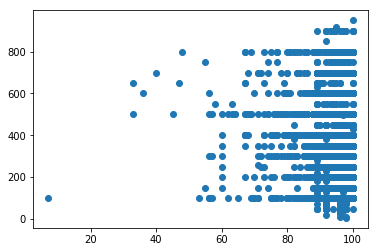

In [94]:
plt.scatter(data['Rating'],data['Fees'])

In [96]:
data.groupby('Place')['Fees'].mean()

Place
Bangalore             324.364486
Chennai               283.602339
Coimbatore            154.298246
Delhi                 362.911392
Ernakulam             188.431373
Hyderabad             307.507886
Mumbai                308.292863
Thiruvananthapuram    167.267442
Name: Fees, dtype: float64

In [97]:
def crat(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the meaningful magnitude
    if x>50:
        return 2

In [98]:
data['Rating']=data['Rating'].apply(crat)

In [99]:
test['Rating']=test['Rating'].apply(crat)

In [100]:
data.groupby('Rating')['Fees'].mean()

Rating
1    562.500000
2    307.602553
Name: Fees, dtype: float64

In [106]:
data['Rating'].value_counts(normalize=True)

2    0.998658
1    0.001342
Name: Rating, dtype: float64

In [101]:
def exper(x):
    if x<=33:#33 because the max experience is 66
        return 1 #for meaningful magnitude
    if x>33:
        return 2  

In [103]:
data['Experience']=data['Experience'].apply(exper)

In [104]:
test['Experience']=test['Experience'].apply(exper)

In [105]:
data.groupby('Experience')['Fees'].mean()

Experience
1    312.954683
2    268.045113
Name: Fees, dtype: float64

In [107]:
data['Experience'].value_counts(normalize=True)

1    0.888442
2    0.111558
Name: Experience, dtype: float64

# Transforming  Place 

In [108]:
data['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

then we use target enconding

In [110]:
place=data.groupby('Place')['Fees'].mean()

In [111]:
data['Place']=data['Place'].map(place)

In [112]:
test['Place']=test['Place'].map(place)

In [118]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,1,2,188.431373,306.499407,100
1,BAMS,1,2,324.364486,238.968193,350
2,MBBS,1,2,324.364486,387.321429,300
3,BSC,1,2,324.364486,238.968193,250
4,BAMS,1,2,283.602339,238.968193,250


In [115]:
profile=data.groupby('Profile')['Fees'].mean()

In [116]:
data['Profile']=data['Profile'].map(profile)

In [117]:
test['Profile']=test['Profile'].map(profile)

In [120]:
qualification=data.groupby('Qualification')['Fees'].mean()

In [121]:
data['Qualification']=data['Qualification'].map(qualification)

In [122]:
test['Qualification']=test['Qualification'].map(qualification)

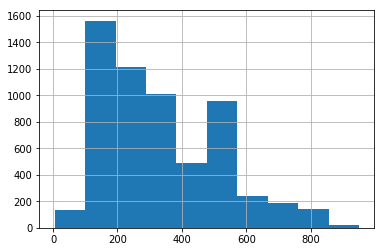

In [123]:
data['Fees'].hist()

In [124]:
data['Fees']=np.log(data['Fees'])

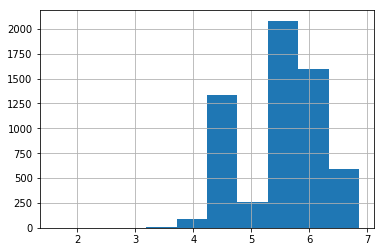

In [125]:
data['Fees'].hist()

Data spliting

In [126]:
X=data.drop('Fees',axis=1)
y=data['Fees']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [129]:
import lightgbm as lgb

In [135]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'eval_metric': 'rmsle',
    'max_depth': 7, 
    'learning_rate': 0.1,
    'verbose': 0, 
    'early_stopping_round': 30}
n_estimators = 700


In [131]:
 d_train = lgb.Dataset(X_train, label=y_train)

In [132]:
d_valid = lgb.Dataset(X_test, label=y_test)

In [133]:
watchlist = [d_valid]

In [136]:
 model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

C:\Users\Mubarak\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 0.440246
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l2: 0.427177
[3]	valid_0's l2: 0.416708
[4]	valid_0's l2: 0.408357
[5]	valid_0's l2: 0.401524
[6]	valid_0's l2: 0.396379
[7]	valid_0's l2: 0.392363
[8]	valid_0's l2: 0.389333
[9]	valid_0's l2: 0.386755
[10]	valid_0's l2: 0.384954
[11]	valid_0's l2: 0.383612
[12]	valid_0's l2: 0.382489
[13]	valid_0's l2: 0.381202
[14]	valid_0's l2: 0.380227
[15]	valid_0's l2: 0.379637
[16]	valid_0's l2: 0.379168
[17]	valid_0's l2: 0.378785
[18]	valid_0's l2: 0.378524
[19]	valid_0's l2: 0.378303
[20]	valid_0's l2: 0.378106
[21]	valid_0's l2: 0.378033
[22]	valid_0's l2: 0.377998
[23]	valid_0's l2: 0.377899
[24]	valid_0's l2: 0.377992
[25]	valid_0's l2: 0.378036
[26]	valid_0's l2: 0.378052
[27]	valid_0's l2: 0.378112
[28]	valid_0's l2: 0.378353
[29]	valid_0's l2: 0.378643
[30]	valid_0's l2: 0.378832
[31]	valid_0's l2: 0.378953
[32]	valid_0's l2: 0.379121
[33]	valid_0's l2: 0.379242
[34]	valid_0's l2: 0.37

In [137]:
 preds = model.predict(test)

In [138]:
preds = np.exp(preds)

In [139]:
Doctor=pd.DataFrame()

In [140]:
Doctor['Fees']=preds

In [141]:
Doctor.to_excel('doctor1.xlsx',index=False)

In [142]:
Doctor.head()

,Fees
0,181.418415
1,344.673649
2,253.090759
3,246.189086
4,215.212146


In [143]:
prete=model.predict(X_test)

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
np.sqrt(mean_squared_error(y_test,prete))

0.6147351496684083